#### TYPES OF TRANSACTIONS
On Ethereum there are a few different types of transactions:

* Regular transactions: a transaction from one account to another.
* Contract deployment transactions: a transaction without a 'to' address, where the data field is used for the contract code.
* Execution of a contract: a transaction that interacts with a deployed smart contract. In this case, 'to' address is the smart contract address.

#### Identifying potential scams in the Ethereum (or any blockchain) ecosystem requires vigilance and awareness of common fraudulent tactics. Here are some ways to identify if an Ethereum transaction or related activity might be a scam:

* Unsolicited Requests: Be wary of unsolicited messages or emails asking you to send Ethereum or other cryptocurrencies. Scammers often use phishing tactics to trick users into sending funds.
* Too-Good-To-Be-True Offers: If an offer promises extremely high returns with little to no risk, it's likely a scam. Remember the old adage: if it sounds too good to be true, it probably is.
* Fake Websites and Wallets: Scammers often create fake websites or wallets that mimic legitimate platforms. Always ensure you're using the official website or trusted platforms and double-check URLs.
* Unusual Transaction Requests: If someone asks you to send a small amount of Ethereum first to verify your address or unlock a larger transaction, it could be a scam.
* Unverified Projects or ICOs: Be cautious when investing in new projects or Initial Coin Offerings (ICOs) that lack transparency, have no clear roadmap, or offer vague information about their team and project.
* Impersonation Scams: Scammers may impersonate well-known personalities, influencers, or companies in the crypto space to gain trust and deceive users into sending funds.
* Ponzi or Pyramid Schemes: Be wary of investment schemes that rely on recruiting new participants to pay returns to existing members. These schemes are unsustainable and often lead to significant losses for participants.
* Smart Contract Vulnerabilities: While Ethereum smart contracts are designed to be secure, they can still contain vulnerabilities or be exploited if not properly audited. Be cautious when interacting with smart contracts, especially those that haven't been audited by reputable firms.
* Fake Airdrops or Giveaways: Scammers may promote fake airdrops or giveaways on social media platforms, asking users to send a small amount of Ethereum to participate. Legitimate projects typically do not ask for upfront payments for airdrops or giveaways.
* Lack of Information or Red Flags: Always research and verify information before participating in any transaction or investment. Look for reviews, check community discussions, and consult trusted sources to identify potential red flags or inconsistencies.


#### Here is a description of the rows of the dataset:
- Index: the index number of a row
- Address: the address of the ethereum account
- FLAG: whether the transaction is fraud or not
- Avg min between sent tnx: Average time between sent transactions for account in minutes
- Avg_min_between_received_tnx: Average time between received transactions for account in minutes
- Time_Diff_between_first_and_last(Mins): Time difference between the first and last transaction
- Sent_tnx: Total number of sent normal transactions
- Received_tnx: Total number of received normal transactions
- Number_of_Created_Contracts: Total Number of created contract transactions
- Unique_Received_From_Addresses: Total Unique addresses from which account received transactions
- Unique_Sent_To_Addresses20: Total Unique addresses from which account sent transactions
- Min_Value_Received: Minimum value in Ether ever received
- Max_Value_Received: Maximum value in Ether ever received
- Avg_Value_Received5Average value in Ether ever received
- Min_Val_Sent: Minimum value of Ether ever sent
- Max_Val_Sent: Maximum value of Ether ever sent
- Avg_Val_Sent: Average value of Ether ever sent
- Min_Value_Sent_To_Contract: Minimum value of Ether sent to a contract
- Max_Value_Sent_To_Contract: Maximum value of Ether sent to a contract
- Avg_Value_Sent_To_Contract: Average value of Ether sent to contracts
- Total_Transactions(Including_Tnx_to_Create_Contract): Total number of transactions
- Total_Ether_Sent:Total Ether sent for account address
- Total_Ether_Received: Total Ether received for account address
- Total_Ether_Sent_Contracts: Total Ether sent to Contract addresses
- Total_Ether_Balance: Total Ether Balance following enacted transactions
- Total_ERC20_Tnxs: Total number of ERC20 token transfer transactions
- ERC20_Total_Ether_Received: Total ERC20 token received transactions in Ether
- ERC20_Total_Ether_Sent: Total ERC20token sent transactions in Ether
- ERC20_Total_Ether_Sent_Contract: Total ERC20 token transfer to other contracts in Ether
- ERC20_Uniq_Sent_Addr: Number of ERC20 token transactions sent to Unique account addresses
- ERC20_Uniq_Rec_Addr: Number of ERC20 token transactions received from Unique addresses
- ERC20_Uniq_Rec_Contract_Addr: Number of ERC20token transactions received from Unique contract addresses
- ERC20_Avg_Time_Between_Sent_Tnx: Average time between ERC20 token sent transactions in minutes
- ERC20_Avg_Time_Between_Rec_Tnx: Average time between ERC20 token received transactions in minutes
- ERC20_Avg_Time_Between_Contract_Tnx: Average time ERC20 token between sent token transactions
- ERC20_Min_Val_Rec: Minimum value in Ether received from ERC20 token transactions for account
- ERC20_Max_Val_Rec: Maximum value in Ether received from ERC20 token transactions for account
- ERC20_Avg_Val_Rec: Average value in Ether received from ERC20 token transactions for account
- ERC20_Min_Val_Sent: Minimum value in Ether sent from ERC20 token transactions for account
- ERC20_Max_Val_Sent: Maximum value in Ether sent from ERC20 token transactions for account
- ERC20_Avg_Val_Sent: Average value in Ether sent from ERC20 token transactions for account
- ERC20_Uniq_Sent_Token_Name: Number of Unique ERC20 tokens transferred
- ERC20_Uniq_Rec_Token_Name: Number of Unique ERC20 tokens received
- ERC20_Most_Sent_Token_Type: Most sent token for account via ERC20 transaction
- ERC20_Most_Rec_Token_Type: Most received token for account via ERC20 transactions

#### We can observe the nature of the columns from the above mentioned column list. The two kinds of information are:
1. Transaction related.
2. Account Related.

In [58]:
# libraries
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sweetviz as sv
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,classification_report, precision_recall_curve, average_precision_score, auc, roc_curve
from evidently.report import Report
from evidently.metric_preset import ClassificationPreset
from evidently import ColumnMapping

from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm

pd.set_option("display.max_columns",300)


In [28]:
# Load the dataset
eth_ds = pd.read_csv('./Dataset/transaction_stores_202403080113.csv',index_col=0)

In [29]:
eth_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 2024-02-06 06:06:00.690 -0500 to 2024-02-06 06:20:26.649 -0500
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   hash               80000 non-null  object
 1   nonce              80000 non-null  int64 
 2   transaction_index  80000 non-null  int64 
 3   from_address       80000 non-null  object
 4   to_address         78367 non-null  object
 5   value              80000 non-null  object
 6   gas                80000 non-null  int64 
 7   gas_price          80000 non-null  int64 
 8   input              80000 non-null  object
 9   transaction_type   80000 non-null  int64 
 10  block_timestamp    80000 non-null  object
 11  block_number       80000 non-null  int64 
 12  block_hash         80000 non-null  object
dtypes: int64(6), object(7)
memory usage: 8.5+ MB


Dropping redundant and useless columns.

In [30]:
eth_ds.drop(columns=['hash','block_number','block_timestamp','block_hash','transaction_type','input','to_address','from_address','nonce','transaction_index'],inplace=True)

In [32]:
eth_ds.reset_index(drop=True,inplace=True)

In [35]:
eth_ds.value = eth_ds.value.astype('float')

In [36]:
eth_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   value      80000 non-null  float64
 1   gas        80000 non-null  int64  
 2   gas_price  80000 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.8 MB


In [37]:
eth_ds.head()

,value,gas,gas_price
0,1.007263e+18,21000,20000000000
1,0.000000e+00,170047,50000000000
2,0.000000e+00,2000000,20000000000
3,4.659848e+16,21001,43000000000
4,4.382601e+17,90000,20000000000


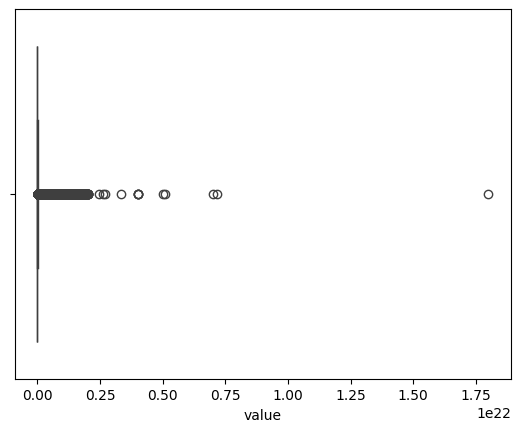

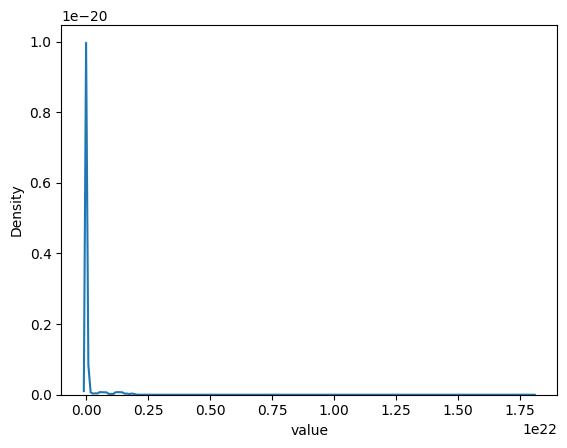

In [46]:
plt.show()
sns.boxplot(x=eth_ds['value'])
plt.show()
sns.kdeplot(x=eth_ds['value'])
plt.show()

### Feature Analysis
<i>From the above columns, we wish to extract and engineer a set of features that will help us classify the transaction as fraudulent or safe.</i>

- total value in ETH sent by a wallet
- total received value in ETH by a wallet
- A number of transactions sent by a wallet
- A number of transactions received by a wallet over a time period
- average time between transactions performed bysending wallet
- average time between transactions to a receiving wallet
- standard deviation of time between transactions performed by a sending wallet
- standard deviation of transaction time in seconds to receiving wallet - standard deviation of time between transactions to a receiving wallet
- average value in ETH sent by a wallet
- average value in ETH received by a wallet

### Automated data analysis using sweetviz

### Data Visualization

<Axes: xlabel='gas', ylabel='gas_price'>

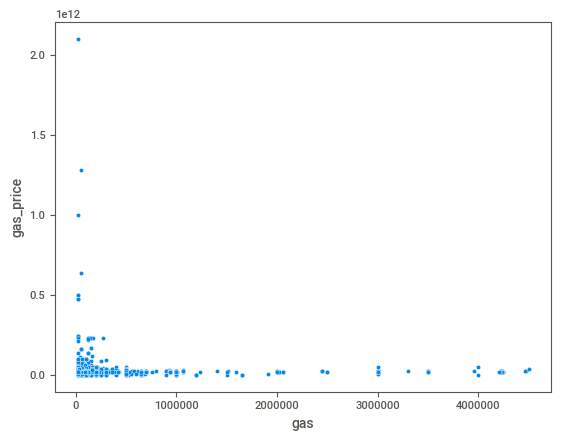

In [49]:
sns.scatterplot(x=eth_ds['gas'],y=eth_ds['gas_price'])

Data Cleaning and PreProcessing

In [51]:
eth_ds.var()

value        1.032520e+41
gas          3.805784e+10
gas_price    2.780663e+20
dtype: float64

We can remove the columns that have 0 variance as they have the same value throughout the dataset and provide no insights to model training.

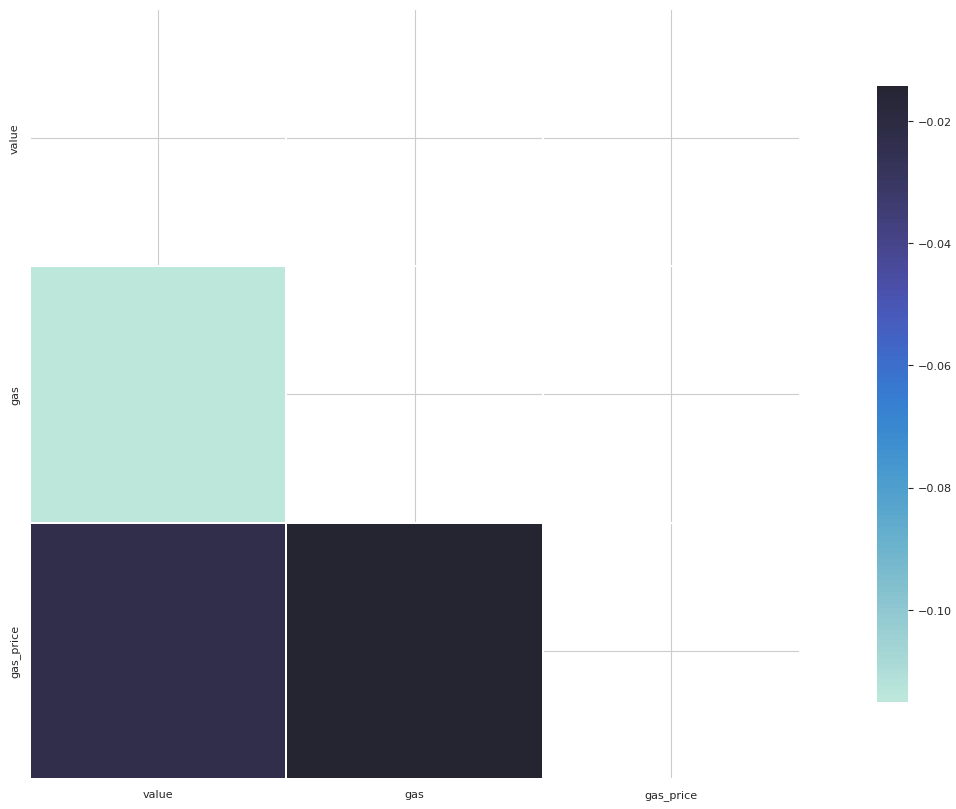

In [52]:
# Correlation Analysis
corr = eth_ds.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(20,10))
    sns.heatmap(corr,  mask=mask, annot=False, center=0, linewidths=0.08, square=True,cbar_kws={"shrink": .8})

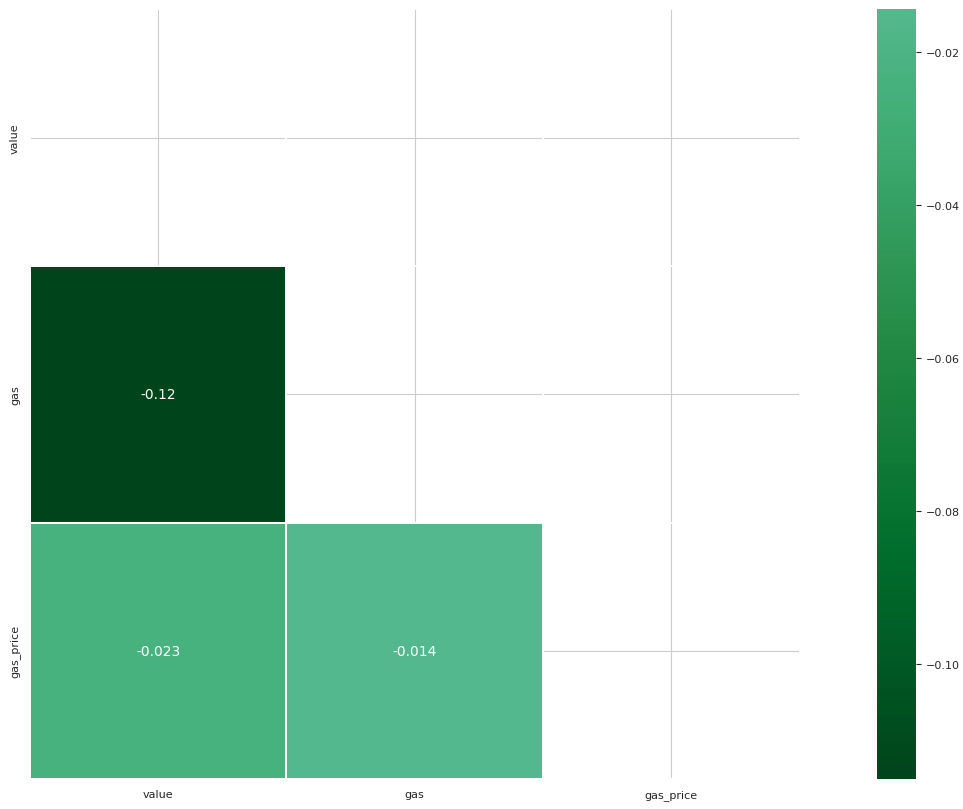

In [53]:
# Recheck the Correlation matrix
corr = eth_ds.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(20,10))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='BuGn_r', center=0, linewidths=0.1, square=True)

### Modelling

In [97]:
# Scaling or Normalization of Numerical features
scaler = MinMaxScaler()
scaler.fit(eth_ds)
X_train = scaler.transform(eth_ds)

In [98]:
# Converting it back to dataframes for easier handling
X_train = pd.DataFrame(X_train,columns=eth_ds.columns)

### Isolation Forest Anomaly Detection

In an Isolation Forest, randomly sub-sampled data is processed in a tree structure based on randomly selected features. The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them. Similarly, the samples which end up in shorter branches indicate anomalies as it was easier for the tree to separate them from other observations.

In [99]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
model.fit(X_train)
print(model.get_params())

{'bootstrap': False, 'contamination': 0.05, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 50, 'n_jobs': None, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [100]:
X_train['scores'] = model.decision_function(X_train[['value','gas','gas_price']])

X_train['anomaly_score'] = model.predict(X_train[['value','gas','gas_price']])

In [101]:
X_train['anomaly_score'].value_counts()

anomaly_score
 1    76004
-1     3996
Name: count, dtype: int64

<Axes: ylabel='Density'>

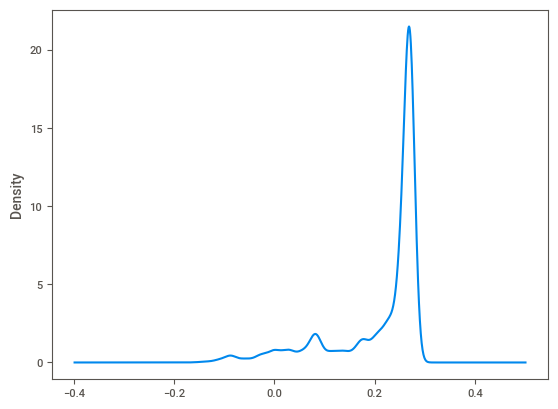

In [102]:
X_train['scores'].plot(kind='kde')

<Axes: xlabel='scores', ylabel='None'>

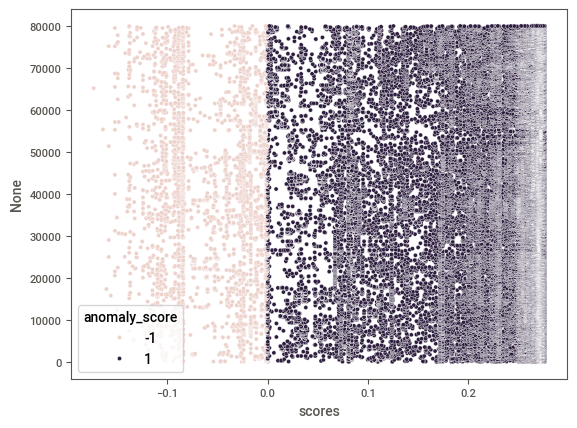

In [103]:
sns.scatterplot(y=X_train.index,x=X_train.scores,hue=X_train['anomaly_score'])